# 前準備

In [1]:
%%capture
!pip install linearmodels

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from linearmodels.panel import PanelOLS

URL_ORGAN_SHORT = "https://raw.githubusercontent.com/HirotakeIto/intro_to_impact_evaluation_with_python/main/data/ch4_organ_donations_short.csv"
URL_ORGAN_FULL = "https://raw.githubusercontent.com/HirotakeIto/intro_to_impact_evaluation_with_python/main/data/ch4_organ_donations_full.csv"

In [3]:
import warnings
warnings.simplefilter('ignore')

# DIDの発想に基づく施策効果分析
### プログラム4.1 DID の発想に基づく施策効果分析

書籍上では次のようなコードになっています。
```python
import pandas as pd

# データの読み込み
df_organ_donations_short = pd.read_csv(URL_ORGAN_SHORT)
# 4状況ごとのアウトカムの計算
df_organ_donations_short.groupby(
    ["IsTreatmentGroup", "AfterTreatment"]
)["Rate"].mean().reset_index()
```

In [4]:
# データの読み込み
df_organ_donations_short = pd.read_csv(URL_ORGAN_SHORT)
# 4状況ごとのアウトカムの計算
df_organ_donations_short.groupby(
    ["IsTreatmentGroup", "AfterTreatment"]
)["Rate"].mean().reset_index()

,IsTreatmentGroup,AfterTreatment,Rate
0,0,0,0.449015
1,0,1,0.459881
2,1,0,0.274300
3,1,1,0.263600


In [5]:
df_organ_donations_short.head()

,State,Quarter,Rate,Quarter_Num,IsTreatmentGroup,AfterTreatment,IsTreatment
0,Alaska,Q22011,0.7700,3,0,0,0
1,Alaska,Q32011,0.7800,4,0,1,0
2,Arizona,Q22011,0.2261,3,0,0,0
3,Arizona,Q32011,0.2503,4,0,1,0
4,California,Q22011,0.2743,3,1,0,0


In [6]:
(26.4 - 27.4) - (46.0 - 44.9)

-2.1000000000000014

### プログラム4.2 DID による訴求内容変更施策の分析
書籍上では次のようなコードになっています。

```python
import statsmodels.formula.api as smf

# データの読み込み
df_organ_donations_short = pd.read_csv(URL_ORGAN_SHORT)
# 推定
result = smf.ols(
    formula="Rate ~ IsTreatment + C(State) + C(Quarter_Num)",
    data=df_organ_donations_short,
).fit()
# 標準誤差の補正
result_correted = result.get_robustcov_results(
    "cluster", groups=df_organ_donations_short["State"]
)
# 結果の出力
result_correted.summary().tables[1]
```

In [7]:
# データの読み込み
df_organ_donations_short = pd.read_csv(URL_ORGAN_SHORT)
# 推定
result = smf.ols(
    formula="Rate ~ IsTreatment + C(State) + C(Quarter_Num)",
    data=df_organ_donations_short,
).fit()
# 標準誤差の補正
result_correted = result.get_robustcov_results(
    "cluster", groups=df_organ_donations_short["State"]
)
# 結果の出力
result_correted.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.7696,0.004,216.842,0.000,0.762,0.777
C(State)[T.Arizona],-0.5368,8.3e-16,-6.47e+14,0.000,-0.537,-0.537
C(State)[T.California],-0.4953,0.004,-139.552,0.000,-0.503,-0.488
C(State)[T.Colorado],-0.1024,1e-15,-1.02e+14,0.000,-0.102,-0.102
C(State)[T.Connecticut],-0.3758,9.61e-16,-3.91e+14,0.000,-0.376,-0.376
C(State)[T.District of Columbia],-0.4262,8.3e-16,-5.13e+14,0.000,-0.426,-0.426
C(State)[T.Florida],-0.3686,9.42e-16,-3.91e+14,0.000,-0.369,-0.369
C(State)[T.Hawaii],-0.3467,8.25e-16,-4.2e+14,0.000,-0.347,-0.347
C(State)[T.Louisiana],-0.1966,8.59e-16,-2.29e+14,0.000,-0.197,-0.197
C(State)[T.Maryland],-0.3115,1.08e-15,-2.89e+14,0.000,-0.312,-0.312


- 本のために一部を省略して表示

In [8]:
result_table_abbv = result_correted.summary().tables[1]
for i in range(4, 26):
    result_table_abbv.pop(4)
result_table_abbv

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.7696,0.004,216.842,0.000,0.762,0.777
C(State)[T.Arizona],-0.5368,8.3e-16,-6.47e+14,0.000,-0.537,-0.537
C(State)[T.California],-0.4953,0.004,-139.552,0.000,-0.503,-0.488
C(State)[T.Wisconsin],-0.2046,9.59e-16,-2.13e+14,0.000,-0.205,-0.205
C(State)[T.Wyoming],-0.1826,8.28e-16,-2.21e+14,0.000,-0.183,-0.183
C(Quarter_Num)[T.4],0.0109,0.007,1.531,0.138,-0.004,0.025
IsTreatment,-0.0216,0.007,-3.038,0.005,-0.036,-0.007


- linermodelsを使っても同じ結果になることを確認

In [9]:
mod = PanelOLS.from_formula(
    formula="Rate ~ IsTreatment + EntityEffects + TimeEffects",
    data=df_organ_donations_short.set_index(["State", "Quarter_Num"]),
)
result = mod.fit(cov_type="clustered", cluster_entity=True)
result.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
IsTreatment,-0.0216,0.0070,-3.0673,0.0051,-0.0360,-0.0071


# 2期間以上のデータの場合のDID

### プログラム4.3 DID による多期間データの分析
書籍上では次のようなコードになっています。

```python
# データの読み込み
df_organ_donations_full = pd.read_csv(URL_ORGAN_FULL)
# 推定
result = smf.ols(
    formula="Rate ~ IsTreatment + C(State) + C(Quarter_Num)",
    data=df_organ_donations_full,
).fit()
# 標準誤差の補正
result_correted = result.get_robustcov_results(
    "cluster", groups=df_organ_donations_full["State"]
)
# 結果の出力
result_correted.summary().tables[1]
```

In [10]:
# データの読み込み
df_organ_donations_full = pd.read_csv(URL_ORGAN_FULL)
# 推定
result = smf.ols(
    formula="Rate ~ IsTreatment + C(State) + C(Quarter_Num)",
    data=df_organ_donations_full,
).fit()
# 標準誤差の補正
result_correted = result.get_robustcov_results(
    "cluster", groups=df_organ_donations_full["State"]
)
# 結果の出力
result_correted.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.7655,0.005,147.502,0.000,0.755,0.776
C(State)[T.Arizona],-0.5329,8.85e-16,-6.02e+14,0.000,-0.533,-0.533
C(State)[T.California],-0.4950,0.003,-147.316,0.000,-0.502,-0.488
C(State)[T.Colorado],-0.1055,8.59e-16,-1.23e+14,0.000,-0.105,-0.105
C(State)[T.Connecticut],-0.3802,1.33e-15,-2.87e+14,0.000,-0.380,-0.380
C(State)[T.District of Columbia],-0.4301,1.04e-15,-4.15e+14,0.000,-0.430,-0.430
C(State)[T.Florida],-0.3770,8.62e-16,-4.37e+14,0.000,-0.377,-0.377
C(State)[T.Hawaii],-0.3524,8.32e-16,-4.23e+14,0.000,-0.352,-0.352
C(State)[T.Louisiana],-0.2167,1.06e-15,-2.04e+14,0.000,-0.217,-0.217
C(State)[T.Maryland],-0.3076,8.62e-16,-3.57e+14,0.000,-0.308,-0.308


In [11]:
df_organ_donations_full.head(10)

,State,Quarter,Rate,Quarter_Num,IsTreatmentGroup,AfterTreatment,IsTreatment
0,Alaska,Q42010,0.7500,1,0,0,0
1,Alaska,Q12011,0.7700,2,0,0,0
2,Alaska,Q22011,0.7700,3,0,0,0
3,Alaska,Q32011,0.7800,4,0,1,0
4,Alaska,Q42011,0.7800,5,0,1,0
5,Alaska,Q12012,0.7900,6,0,1,0
6,Arizona,Q42010,0.2634,1,0,0,0
7,Arizona,Q12011,0.2092,2,0,0,0
8,Arizona,Q22011,0.2261,3,0,0,0
9,Arizona,Q32011,0.2503,4,0,1,0


- 上記のテーブルの省略版

In [12]:
result_table_abbv = result_correted.summary().tables[1]
for i in range(4, 26):
    result_table_abbv.pop(4)
result_table_abbv

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.7655,0.005,147.502,0.000,0.755,0.776
C(State)[T.Arizona],-0.5329,8.85e-16,-6.02e+14,0.000,-0.533,-0.533
C(State)[T.California],-0.4950,0.003,-147.316,0.000,-0.502,-0.488
C(State)[T.Wisconsin],-0.2012,1.11e-15,-1.82e+14,0.000,-0.201,-0.201
C(State)[T.Wyoming],-0.1823,8.99e-16,-2.03e+14,0.000,-0.182,-0.182
C(Quarter_Num)[T.2],-0.0024,0.006,-0.420,0.678,-0.014,0.009
C(Quarter_Num)[T.3],0.0049,0.005,0.919,0.367,-0.006,0.016
C(Quarter_Num)[T.4],0.0158,0.007,2.217,0.036,0.001,0.030
C(Quarter_Num)[T.5],0.0116,0.006,2.015,0.054,-0.000,0.024
C(Quarter_Num)[T.6],0.0168,0.013,1.327,0.196,-0.009,0.043


### プログラム4.4 イベントスタディによる多期間データの分析

書籍上では次のようなコードになっています。

```python
# データの読み込み
df_organ_donations_full = pd.read_csv(URL_ORGAN_FULL)
# 時間に関するダミー変数を作成
quarter_dummies = pd.get_dummies(
    df_organ_donations_full["Quarter_Num"],
    prefix="QuarterNum",
    drop_first=False,
    dtype=int,
)
df_regression = pd.concat(
    [df_organ_donations_full, quarter_dummies], axis=1
)
# 分析
formula = (
    "Rate ~ QuarterNum_1:IsTreatmentGroup"
    " + QuarterNum_2:IsTreatmentGroup"
    " + QuarterNum_4:IsTreatmentGroup"
    " + QuarterNum_5:IsTreatmentGroup"
    " + QuarterNum_6:IsTreatmentGroup"
    " + C(State) + C(Quarter_Num)"
)
result = smf.ols(formula=formula, data=df_regression).fit()
# 標準誤差の補正
result_correted = result.get_robustcov_results(
    "cluster", groups=df_regression["State"]
)
# 結果の出力
result_correted.summary().tables[1]
```

In [13]:
# データの読み込み
df_organ_donations_full = pd.read_csv(URL_ORGAN_FULL)
# 時間に関するダミー変数を作成
quarter_dummies = pd.get_dummies(
    df_organ_donations_full["Quarter_Num"],
    prefix="QuarterNum",
    drop_first=False,
    dtype=int,
)
df_regression = pd.concat(
    [df_organ_donations_full, quarter_dummies], axis=1
)
# 分析
formula = (
    "Rate ~ QuarterNum_1:IsTreatmentGroup"
    " + QuarterNum_2:IsTreatmentGroup"
    " + QuarterNum_4:IsTreatmentGroup"
    " + QuarterNum_5:IsTreatmentGroup"
    " + QuarterNum_6:IsTreatmentGroup"
    " + C(State) + C(Quarter_Num)"
)
result = smf.ols(formula=formula, data=df_regression).fit()
# 標準誤差の補正
result_correted = result.get_robustcov_results(
    "cluster", groups=df_regression["State"]
)
# 結果の出力
result_correted.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.7657,0.005,142.389,0.000,0.755,0.777
C(State)[T.Arizona],-0.5329,1.21e-15,-4.41e+14,0.000,-0.533,-0.533
C(State)[T.California],-0.4962,0.003,-158.861,0.000,-0.503,-0.490
C(State)[T.Colorado],-0.1055,1.34e-15,-7.86e+13,0.000,-0.105,-0.105
C(State)[T.Connecticut],-0.3802,2e-15,-1.9e+14,0.000,-0.380,-0.380
C(State)[T.District of Columbia],-0.4300,1.79e-15,-2.4e+14,0.000,-0.430,-0.430
C(State)[T.Florida],-0.3770,1.47e-15,-2.57e+14,0.000,-0.377,-0.377
C(State)[T.Hawaii],-0.3524,1.47e-15,-2.39e+14,0.000,-0.352,-0.352
C(State)[T.Louisiana],-0.2167,1.68e-15,-1.29e+14,0.000,-0.217,-0.217
C(State)[T.Maryland],-0.3076,1.58e-15,-1.95e+14,0.000,-0.308,-0.308


In [14]:
df_regression.head(10)

,State,Quarter,Rate,Quarter_Num,IsTreatmentGroup,AfterTreatment,IsTreatment,QuarterNum_1,QuarterNum_2,QuarterNum_3,QuarterNum_4,QuarterNum_5,QuarterNum_6
0,Alaska,Q42010,0.7500,1,0,0,0,1,0,0,0,0,0
1,Alaska,Q12011,0.7700,2,0,0,0,0,1,0,0,0,0
2,Alaska,Q22011,0.7700,3,0,0,0,0,0,1,0,0,0
3,Alaska,Q32011,0.7800,4,0,1,0,0,0,0,1,0,0
4,Alaska,Q42011,0.7800,5,0,1,0,0,0,0,0,1,0
5,Alaska,Q12012,0.7900,6,0,1,0,0,0,0,0,0,1
6,Arizona,Q42010,0.2634,1,0,0,0,1,0,0,0,0,0
7,Arizona,Q12011,0.2092,2,0,0,0,0,1,0,0,0,0
8,Arizona,Q22011,0.2261,3,0,0,0,0,0,1,0,0,0
9,Arizona,Q32011,0.2503,4,0,1,0,0,0,0,1,0,0


- 省略して表記

In [15]:
result_table_abbv = result_correted.summary().tables[1]
for i in range(4, 30):
    result_table_abbv.pop(4)
result_table_abbv

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.7657,0.005,142.389,0.000,0.755,0.777
C(State)[T.Arizona],-0.5329,1.21e-15,-4.41e+14,0.000,-0.533,-0.533
C(State)[T.California],-0.4962,0.003,-158.861,0.000,-0.503,-0.490
C(Quarter_Num)[T.4],0.0156,0.007,2.143,0.042,0.001,0.031
C(Quarter_Num)[T.5],0.0114,0.006,1.945,0.063,-0.001,0.024
C(Quarter_Num)[T.6],0.0167,0.013,1.271,0.215,-0.010,0.044
QuarterNum_1:IsTreatmentGroup,-0.0029,0.006,-0.527,0.603,-0.014,0.009
QuarterNum_2:IsTreatmentGroup,0.0063,0.002,2.528,0.018,0.001,0.011
QuarterNum_4:IsTreatmentGroup,-0.0216,0.006,-3.898,0.001,-0.033,-0.010
QuarterNum_5:IsTreatmentGroup,-0.0203,0.005,-4.127,0.000,-0.030,-0.010


- ビジュアライズ

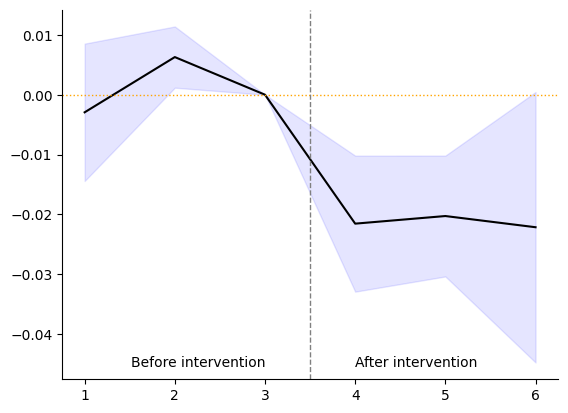

In [16]:
# 利用する情報のセットアップ
colname_time, colname_coef, colname_lower, colname_upper = (
    "time",
    "Coef.",
    "[0.025",
    "0.975]",
)
# プロットする元データを作成する
data = {
    colname_coef: [
        -0.002942,
        0.006296,
        0,
        -0.021565,
        -0.020292,
        -0.022165,
    ],
    colname_lower: [
        -0.014429,
        0.001177,
        0,
        -0.032938,
        -0.030399,
        -0.044787,
    ],
    colname_upper: [
        0.008544,
        0.011415,
        0,
        -0.010193,
        -0.010186,
        0.000457,
    ],
    colname_time: [1, 2, 3, 4, 5, 6],
}
df_plot = pd.DataFrame(data)
# プロットをする
fig, ax = plt.subplots()
ax.plot(
    df_plot[colname_time],
    df_plot[colname_coef],
    color="black",
)
ax.fill_between(
    df_plot[colname_time],
    df_plot[colname_lower],
    df_plot[colname_upper],
    color="blue",
    alpha=0.1,
)
ax.axhline(0, color="orange", linewidth=1, linestyle="dotted")
ax.axvline(3.5, color="grey", linewidth=1, linestyle="dashed")
ax.text(
    3.5 - 0.5,
    df_plot[colname_lower].min(),
    "Before intervention",
    horizontalalignment="right",
    verticalalignment="center",
)
ax.text(
    3.5 + 0.5,
    df_plot[colname_lower].min(),
    "After intervention",
    horizontalalignment="left",
    verticalalignment="center",
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

# DiDの仮定チェック



## プログラム4.5 グラフィカルな図によるプレトレンドテスト

本書では次のようなコードとして表示しています。

```python
import seaborn as sns
import matplotlib.pyplot as plt

# データの読み込み
df_organ_donations_full = pd.read_csv(URL_ORGAN_FULL)
# 集計
df_plot = (
    df_organ_donations_full.groupby(
        ["IsTreatmentGroup", "Quarter_Num"]
    )["Rate"]
    .mean()
    .reset_index()
)
# プロット
fig, ax = plt.subplots()
sns.lineplot(
    data=df_plot,
    x="Quarter_Num",
    y="Rate",
    hue="IsTreatmentGroup",
    ax=ax,
)
plt.axvline(3.5, color="grey", linewidth=1, linestyle="dashed")
plt.ylim(0, df_plot["Rate"].max() + 0.1)
plt.show()
```

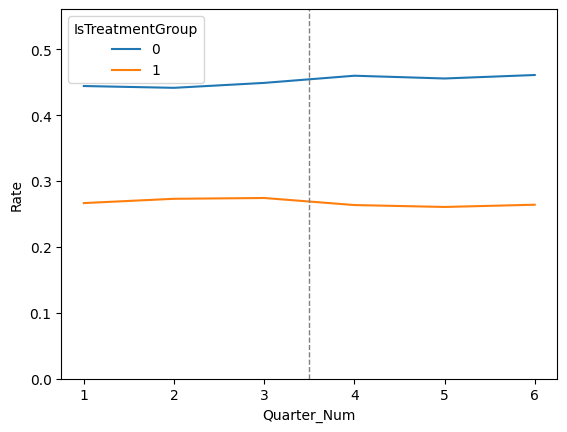

In [17]:
# データの読み込み
df_organ_donations_full = pd.read_csv(URL_ORGAN_FULL)
# 集計
df_plot = (
    df_organ_donations_full.groupby(
        ["IsTreatmentGroup", "Quarter_Num"]
    )["Rate"]
    .mean()
    .reset_index()
)
# プロット
fig, ax = plt.subplots()
sns.lineplot(
    data=df_plot,
    x="Quarter_Num",
    y="Rate",
    hue="IsTreatmentGroup",
    ax=ax,
)
plt.axvline(3.5, color="grey", linewidth=1, linestyle="dashed")
plt.ylim(0, df_plot["Rate"].max() + 0.1)
plt.show()